In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import sklearn
from sklearn import datasets, model_selection,linear_model,metrics,preprocessing

In [189]:
iris_data = datasets.load_iris()

print(iris_data.DESCR) # DESCR معلومات عن هذه داتا المستخدمة

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [190]:
# features تمثل الاعمدة  x دائما 
#  تمثل الصف وهي العينات y 

# feature_names تعطيني اسماء الاعمدة
x = pd.DataFrame(iris_data.data , columns= iris_data.feature_names)
y = pd.DataFrame(iris_data.target , columns= ['labels'])
print(x)
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
     labels
0         0
1         0
2   

In [191]:
x,y  = datasets.load_iris(return_X_y=True)
x.shape, y.shape


((150, 4), (150,))

In [192]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.1 , random_state=42 , stratify=y )
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((135, 4), (15, 4), (135,), (15,))

In [193]:
# load_diabetes  هي الداتا لى تحتوي على الداتا متقطعة
x,y = datasets.load_diabetes(return_X_y=True)
x.shape,y.shape

((442, 10), (442,))

In [194]:
from sklearn import preprocessing

#MinMaxScaler : حيث تبدأ جميع البيانات من الصفر 
y_normalize = preprocessing.MinMaxScaler()
y_norm = y_normalize.fit_transform(y.reshape(-1,1)) 

# reshape : حيث تقوم بتحويلها  الى مصفوفة 
# -1 حيث يتم اعطاء قيمة غير معروفة سابقا عن عدد الاعمدة

x_normalize = preprocessing.StandardScaler()
x_norm = x_normalize.fit_transform(x) 
# features هنا لا يتم استخدامها لوجود في 

In [195]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_norm,y_norm.reshape(-1,),test_size=0.1 , random_state=42 )
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((397, 10), (45, 10), (397,), (45,))

In [196]:
reg = linear_model.LinearRegression()
reg.fit(x_train , y_train)

LinearRegression()

In [197]:
y_pred = reg.predict(x_test)
metrics.mean_squared_error(y_test,y_pred)
# الصفر بكون الجواب صحيح error  كلما اقتربت قيمة 

0.026629314911129524

In [198]:
x,y  =datasets.load_breast_cancer(return_X_y=True)
x.shape, y.shape

((569, 30), (569,))

In [199]:
x_normalize = preprocessing.StandardScaler()
x_norm = x_normalize.fit_transform(x) 

In [200]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_norm,y,test_size=0.1 , random_state=42 , stratify=y)

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((512, 30), (57, 30), (512,), (57,))

In [201]:
lreg = linear_model.LogisticRegression()
lreg.fit(x_train , y_train)
y_pred = lreg.predict(x_test)
metrics.mean_squared_error(y_test,y_pred)

0.03508771929824561

In [202]:
metrics.accuracy_score(y_test,y_pred)

0.9649122807017544

KNN (Classification)

In [203]:
x ,y = datasets.load_iris(return_X_y=True)
x_normalize = preprocessing.StandardScaler()
x_norm = x_normalize.fit_transform(x) 
x.shape , y.shape , x_norm.shape

((150, 4), (150,), (150, 4))

In [204]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_norm,y,test_size=0.1 , random_state=42 , stratify=y)

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((135, 4), (15, 4), (135,), (15,))

In [205]:
from sklearn import neighbors
k = neighbors.KNeighborsClassifier(n_neighbors=3)
k.fit(x_train , y_train)
y_pred = k.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.9333333333333333

Decision Tree


In [206]:
x ,y = datasets.load_iris(return_X_y=True)
x_normalize = preprocessing.StandardScaler()
x_norm = x_normalize.fit_transform(x) 
x.shape , y.shape , x_norm.shape

((150, 4), (150,), (150, 4))

In [207]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_norm,y,test_size=0.1 , random_state=42 , stratify=y)

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((135, 4), (15, 4), (135,), (15,))

In [208]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt.fit(x_train , y_train)


DecisionTreeClassifier()

In [209]:
y_pred = dt.predict(x_test)
metrics.accuracy_score(y_test, y_pred)


0.8666666666666667

[Text(0.4, 0.9166666666666666, 'X[3] <= -0.526\ngini = 0.667\nsamples = 135\nvalue = [45, 45, 45]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 45\nvalue = [45, 0, 0]'),
 Text(0.5, 0.75, 'X[3] <= 0.593\ngini = 0.5\nsamples = 90\nvalue = [0, 45, 45]'),
 Text(0.2, 0.5833333333333334, 'X[2] <= 0.678\ngini = 0.12\nsamples = 47\nvalue = [0, 44, 3]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 43\nvalue = [0, 43, 0]'),
 Text(0.3, 0.4166666666666667, 'X[1] <= -0.707\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.25, 'X[1] <= -1.398\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.5833333333333334, 'X[2] <= 0.621\ngini = 0.045\nsamples = 43\nvalue = [0, 1, 42]'),
 Text(0.7, 0.4166666666666667, 'X[1] <= 0.098\ngini = 0.375\nsamples = 4\nvalue 

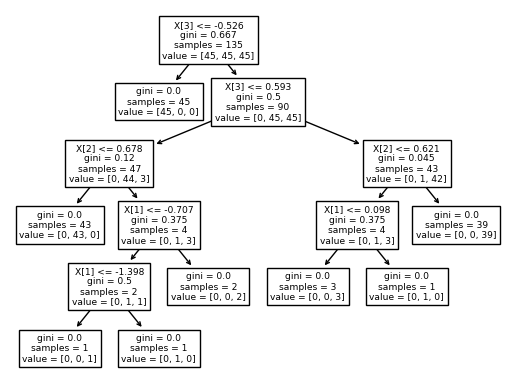

In [210]:
tree.plot_tree(dt)

Random Forest

In [211]:
x ,y = datasets.load_iris(return_X_y=True)

x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.1 , random_state=42 , stratify=y)

x.shape , y.shape , x_norm.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape


((150, 4), (150,), (150, 4), (135, 4), (15, 4), (135,), (15,))

In [212]:
from sklearn import ensemble


rf = ensemble.RandomForestClassifier(random_state=42,n_estimators=100,max_depth=5,n_jobs=-1)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.9333333333333333

Support Vector Machine

In [218]:
x ,y = datasets.load_iris(return_X_y=True)

x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.1 , random_state=42 , stratify=y)

x.shape , y.shape , x_train.shape, x_test.shape, y_train.shape, y_test.shape


((150, 4), (150,), (135, 4), (15, 4), (135,), (15,))

In [217]:
from sklearn import svm


clf = svm.SVC(kernel="rbf",gamma=0.1)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.9333333333333333